# Simulation result analysis

## Section I, trajectory analysis

In [13]:
from Config import Config
from usr_func.checkfolder import checkfolder
import numpy as np
import matplotlib.pyplot as plt
import os 
from tqdm import tqdm
from matplotlib.gridspec import GridSpec

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 20

filepath = "./npy/"
print(os.listdir(filepath))

c = Config()
plg_b = c.get_polygon_border()
plg_o = c.get_polygon_obstacle()


['P2', 'IVR.npy', 'IVR_rmse.npy', 'EIBV_vr.npy', 'IVR_vr.npy', 'EQUAL_vr.npy', 'EIBV_rmse.npy', 'README.md', 'EIBV_ibv.npy', 'EIBV.npy', 'P1', 'EQUAL_ibv.npy', 'IVR_ibv.npy', 'EQUAL.npy', 'EQUAL_rmse.npy']


In [7]:
figpath = "./../../fig/Sim_2DNidelva/Cases/"
d_eq = np.load(filepath + "equal.npy")
d_eibv = np.load(filepath + "eibv.npy")
d_ivr = np.load(filepath + "ivr.npy")
print(os.listdir(figpath))

['P2', '.DS_Store', 'P1']


In [11]:
d_eq.shape

(50, 81, 2)

In [12]:
def plotf(data, i, title):
    ax.plot(plg_b[:, 1], plg_b[:, 0], 'r-.')
    ax.plot(plg_o[:, 1], plg_o[:, 0], 'r-.')
    ax.set_xlabel("East")
    ax.set_ylabel("North")
    ax.set_title(title)
    ax.set_aspect("equal")
    for j in range(data.shape[0]):
        ax.plot(data[j, :i, 1], data[j, :i, 0], 'k.-', alpha=.1)
        
for i in tqdm(range(d_eq.shape[1])):
    fig = plt.figure(figsize=(40, 12))
    gs = GridSpec(nrows=1, ncols=3)
    
    ax = fig.add_subplot(gs[0])
    plotf(d_eq, i, "EIBV: 1.0, IVR: 1.0")

    ax = fig.add_subplot(gs[1])
    plotf(d_eibv, i, "EIBV: 1.9, IVR: 0.1")
    
    ax = fig.add_subplot(gs[2])
    plotf(d_ivr, i, "EIBV: 0.1, IVR: 1.9")
        
    plt.savefig(figpath + "P_{:03d}.png".format(i))
    plt.close("all")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 81/81 [00:34<00:00,  2.37it/s]


In [2]:
pb = c.get_polygon_border()
po = c.get_polygon_obstacle()

In [43]:
s1 = np.load(filepath + "eibv_ivr_1.90_0.10.npy")
s2 = np.load(filepath + "eibv_ivr_0.10_1.90.npy")
s3 = np.load(filepath + "eibv_ivr_1.00_1.00.npy")

def plotf(s, i): 
    plt.plot(pb[:, 1], pb[:, 0], 'r-.')
    plt.plot(po[:, 1], po[:, 0], 'r-.')
    for j in range(s.shape[0]):
        plt.plot(s[j, :i, 1], s[j, :i, 0], 'k.-', alpha=.1)
    plt.gca().set_aspect('equal')
    plt.xlabel("East")
    plt.ylabel("North")
#     plt.title("Iteration: " + str(i))

for i in tqdm(range(s1.shape[1])):

    fig = plt.figure(figsize=(30, 10))
    gs = GridSpec(nrows=1, ncols=3)
    ax = fig.add_subplot(gs[0])
    plotf(s1, i)
    ax.set_title("EIBV: {:.2f}, IVR: {:.2f}".format(1.9, .1))

    ax = fig.add_subplot(gs[1])
    plotf(s2, i)
    ax.set_title("EIBV: {:.2f}, IVR: {:.2f}".format(.1, 1.9))

    ax = fig.add_subplot(gs[2])
    plotf(s3, i)
    ax.set_title("EIBV: {:.2f}, IVR: {:.2f}".format(1., 1.))

    plt.savefig(figpath + "P_{:03d}.png".format(i))
    plt.close("all")
#     plt.show()
#     if i == 2: 
#         break

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:51<00:00,  1.03s/it]


## Section II, metric analysis

In [15]:
dibv_eibv = np.load(filepath + "EIBV_ibv.npy")
dibv_ivr = np.load(filepath + "IVR_ibv.npy")
dibv_eq = np.load(filepath + "EQUAL_ibv.npy")


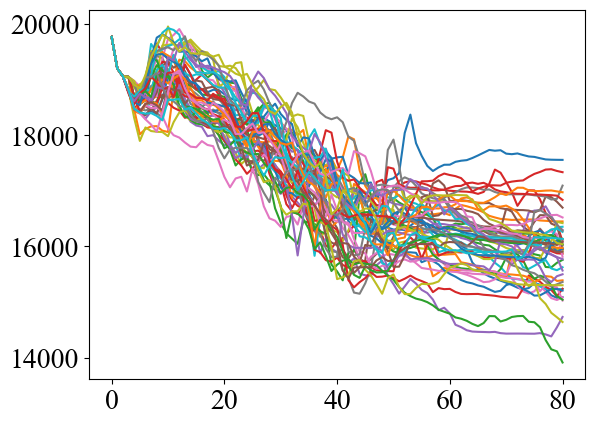

In [18]:
for i in range(dibv_eibv.shape[0]):
    plt.plot(dibv_eibv[i, :])


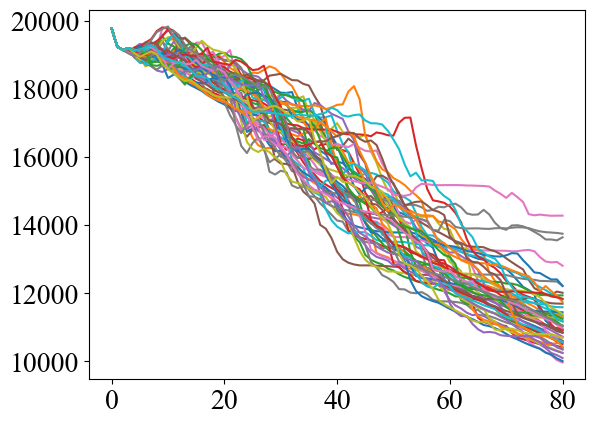

In [19]:
for i in range(dibv_ivr.shape[0]):
    plt.plot(dibv_ivr[i, :])


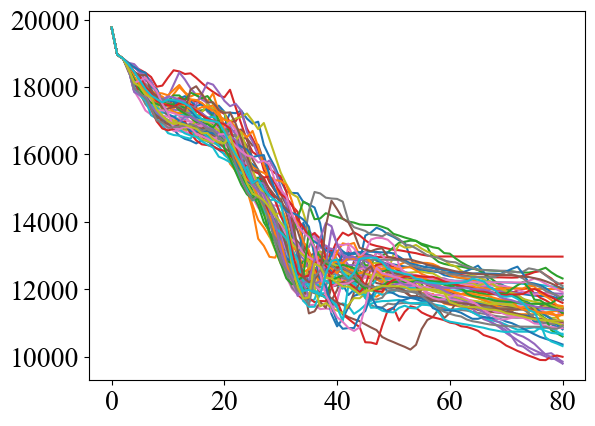

In [20]:
for i in range(dibv_eq.shape[0]):
    plt.plot(dibv_eq[i, :])
